In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
_A_FORCE = "Force"
_A_ANGULAR_VELOCITY = "AngularVelocity"
_A_ATTiTUDE_ANGLE = "AttitudeAngle"
_A_DISPLACEMENT = "Displacement"
_A_FORCE_MOMENT = "ForceMoment"
_A_MAXIMUM_PRESSURE = "MaximumPressure_PointsMotion"
_A_POINTS_MOTION = "PointsMotion"
_A_PRESSURE = "Pressure_PointsMotion"
_A_VELOCITY = "Velocity"

def read_dat(angle: int, time: float, attribute: str):
  sep = " "
  if attribute == _A_POINTS_MOTION:
    sep = '\s+'
  path = "input/AOA%d_tstart_%.2f/%s.dat" % (angle, time, attribute)
  print("ready to read: ", path)
  df = pd.read_csv(path, sep= " ", header= None)
  if attribute not in ["MaximumPressure_PointsMotion", "PointsMotion", "Pressure_PointsMotion"]:
    del df[df.shape[1] - 1]
  
  if attribute == _A_ATTiTUDE_ANGLE:
    df[4] = df[3] / np.pi * 180
  if attribute == _A_DISPLACEMENT:
    df[4] = df[1] - df[1][0]
    df[5] = df[2] - df[2][0]
  return df

df = read_dat(45, 56.50, "Force")
# print(df)



ready to read:  input/AOA45_tstart_56.50/Force.dat


In [52]:
AOAs = [90, 60, 45]
startTimes = [56.50, 58.50, 60.0]

attributes = [_A_FORCE, _A_ANGULAR_VELOCITY, _A_ATTiTUDE_ANGLE, _A_DISPLACEMENT, _A_FORCE_MOMENT, _A_MAXIMUM_PRESSURE,  _A_VELOCITY]

ready to read:  input/AOA90_tstart_56.50/Force.dat
ready to read:  input/AOA90_tstart_58.50/Force.dat
ready to read:  input/AOA90_tstart_60.00/Force.dat
ready to read:  input/AOA60_tstart_56.50/Force.dat
ready to read:  input/AOA60_tstart_58.50/Force.dat
ready to read:  input/AOA60_tstart_60.00/Force.dat
ready to read:  input/AOA45_tstart_56.50/Force.dat
ready to read:  input/AOA45_tstart_58.50/Force.dat
ready to read:  input/AOA45_tstart_60.00/Force.dat


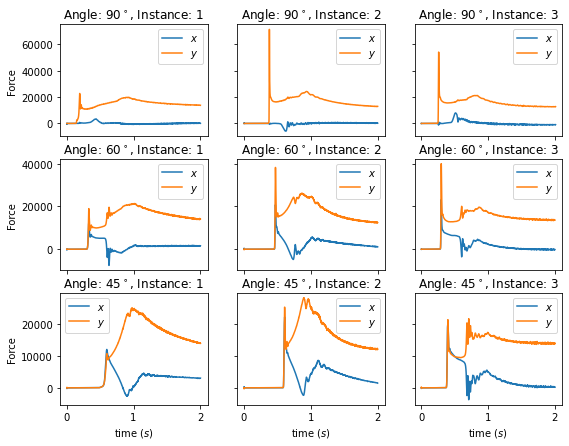

In [55]:
def plot9(attribute: str, columns: list, legend= None, ylabel= None):
  if ylabel == None:
    ylabel = attribute
  # plt.figure(figsize=[9, 7])
  fig, ax = plt.subplots(3, 3, sharex= True, sharey= 'row', figsize= [9, 7])
  for i in range(3):
    AOA = AOAs[i]
    for j in range(3):
      startTime = startTimes[j]
      
      df = read_dat(AOA, startTime, attribute)
      for column in columns:
        ax[i, j].plot(df[0], df[column])

      if j == 0:
        ax[i, j].set_ylabel(ylabel)
      if i == 2:
        ax[i, j].set_xlabel("time ($s$)")
        
      ax[i, j].set_title("Angle: " + str(AOA) + "$^\circ$, Instance: " + str(j + 1))
      if legend != None:
        ax[i, j].legend(legend)
  
  fig.savefig("../figures/nine/" + attribute + ".png")
      
plot9(attributes[0], [1, 2], ['$x$', '$y$'])

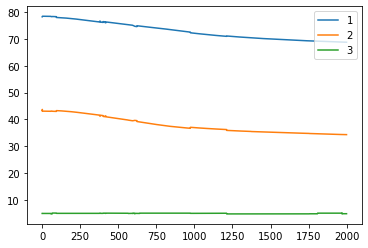

In [71]:
def AOA45_5650():
  df = read_dat(45, 58.50, _A_MAXIMUM_PRESSURE)
  # print(df)
  df[[1, 2, 3]].plot()
  
AOA45_5650()